# Assignment (15-09-2023)

## Priyanka Raghunath (21BAI1013)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## Importing Dataset

In [2]:
df = pd.read_csv('/content/sample_data/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handling Null Data

In [6]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
missing_values=df.isnull().sum()
missing_values[missing_values>0]/len(df)*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [8]:
# Initially
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Handling Embarked (Deleting Rows)
df = df.dropna(subset=['Embarked'])
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
# Handling Cabin (Deleting Column)
df = df.drop(columns=['Cabin'])
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [11]:
# Handling Age (Filling With Mean)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Visualization

<ipython-input-12-6557ed00b6b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(), kde=False, bins=30)


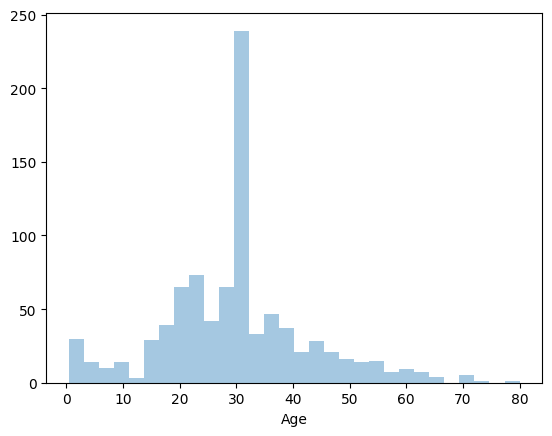

In [12]:
# Visualizing the distribution of age
sns.distplot(df['Age'].dropna(), kde=False, bins=30)
plt.show()

<ipython-input-13-9b38698ecdd9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'].dropna(), kde=False, bins=30)


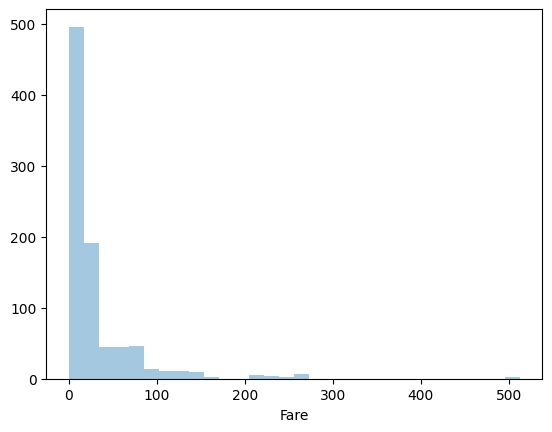

In [13]:
# Visualizing the distribution of fare
sns.distplot(df['Fare'].dropna(), kde=False, bins=30)
plt.show()

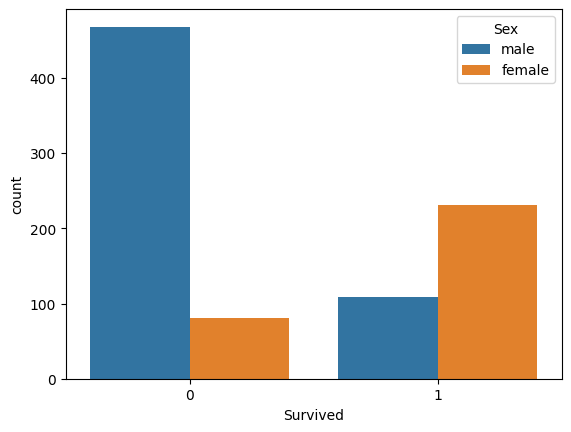

In [14]:
# Visualizing the survival rate based on gender
sns.countplot(x='Survived', data=df, hue='Sex')
plt.show()

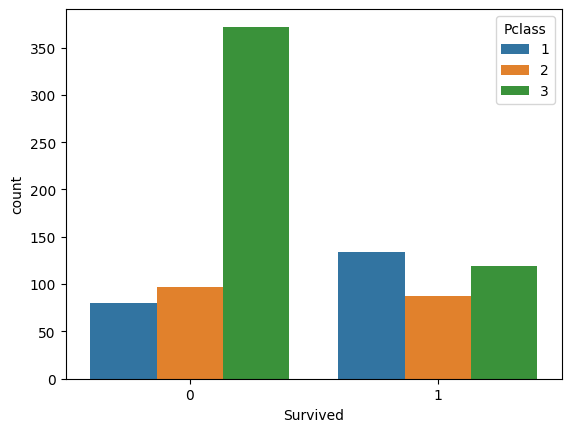

In [15]:
# Visualizing the survival rate based on passenger class
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.show()

<ipython-input-16-61c8441e0cf7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

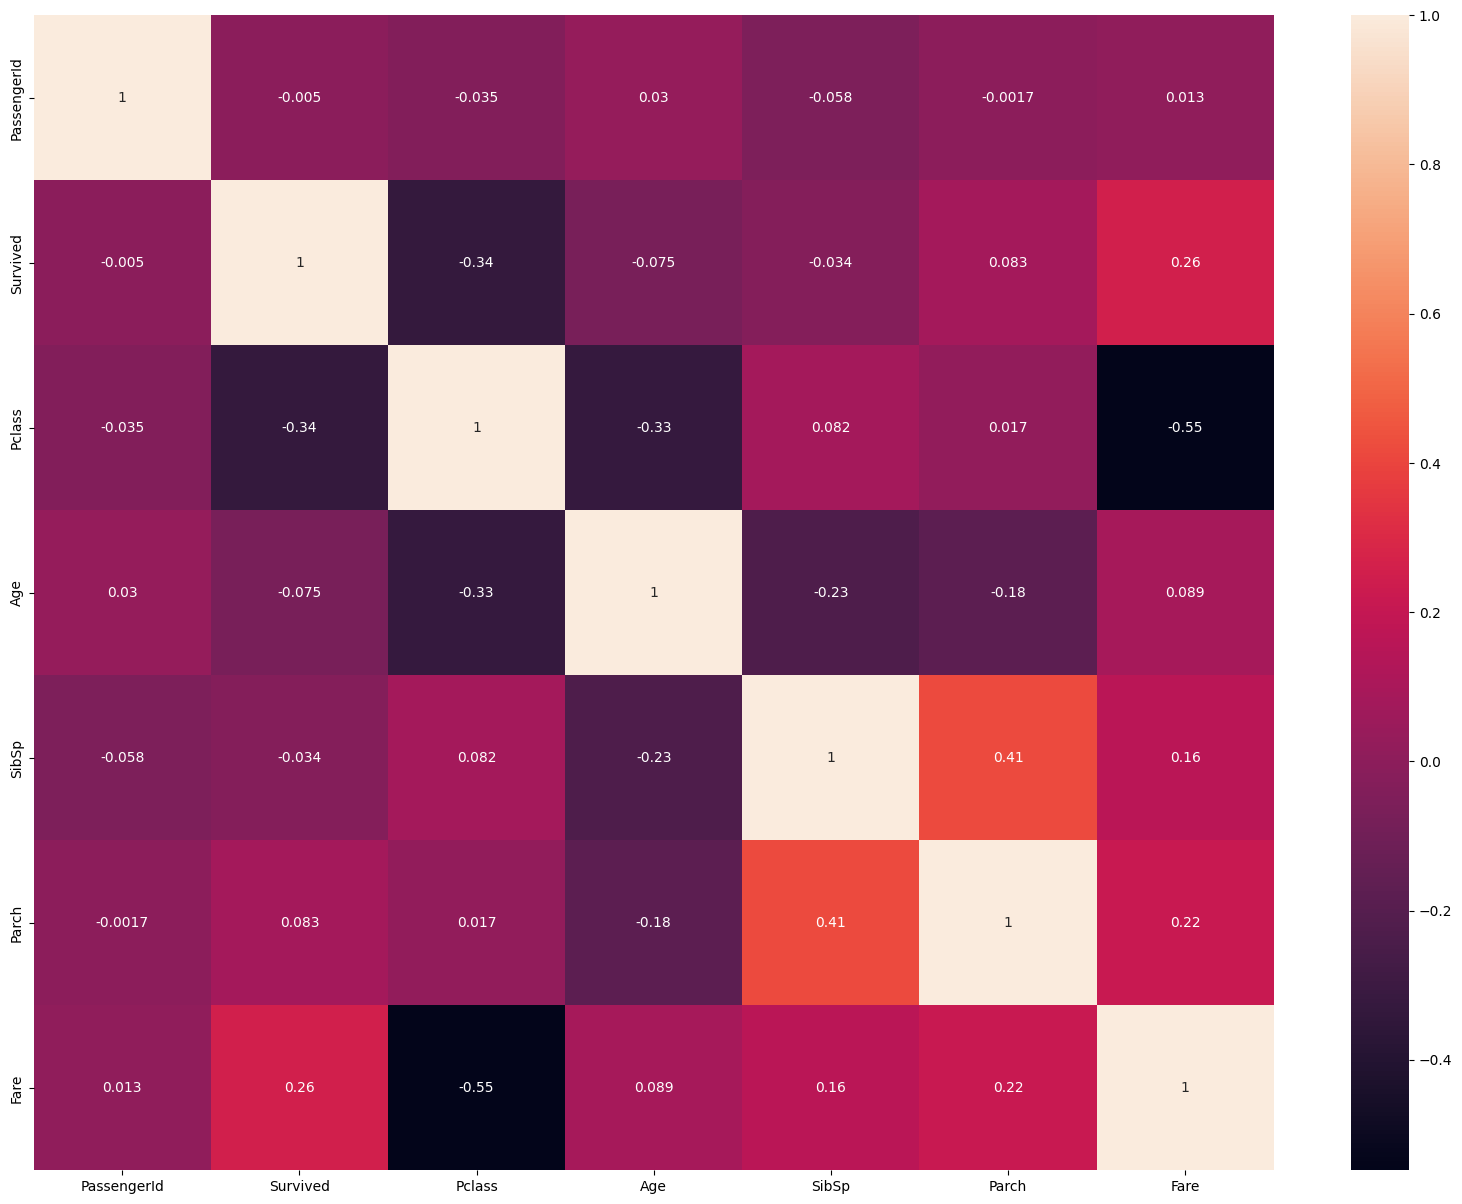

In [16]:
# Visualizing The Heat Map
corr=df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

## Outlier Detection

<Axes: >

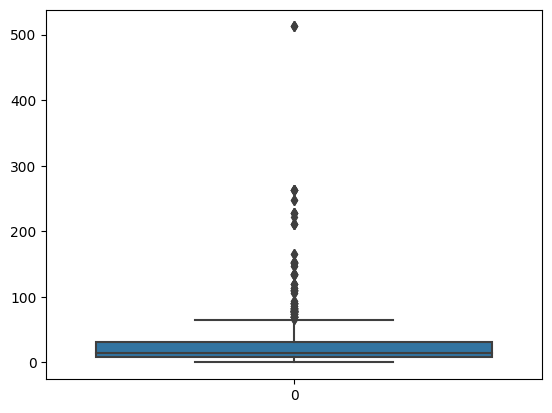

In [17]:
sns.boxplot(df['Fare'])

<Axes: >

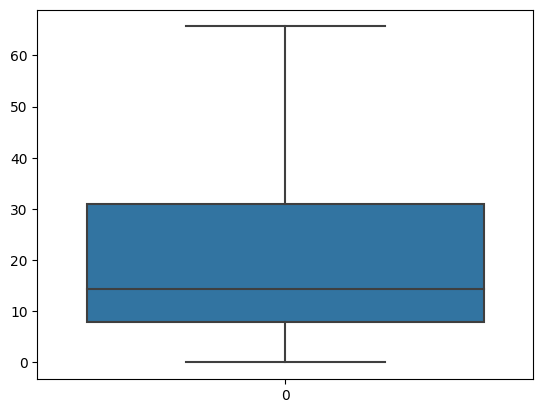

In [18]:
# Flooring And Capping
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))
sns.boxplot(df['Fare'])

## Splitting Data (Dependent & Independent Variables)

In [19]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [20]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6563,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Encoding

In [22]:
label_encoder = LabelEncoder()
x['Sex'] = label_encoder.fit_transform(x['Sex'])
x['Embarked'] = label_encoder.fit_transform(x['Embarked'])

## Feature Scaling

In [23]:
scaler = StandardScaler()
x[['Age', 'Fare']] = scaler.fit_transform(x[['Age', 'Fare']])

## Splitting Data (Test & Train)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
x_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
708,709,1,"Cleaver, Miss. Alice",0,-5.896199e-01,0,0,113781,2.043778,2
240,241,3,"Zabour, Miss. Thamine",0,-5.482138e-16,1,0,2665,-0.465697,0
382,383,3,"Tikkanen, Mr. Juho",1,1.819225e-01,0,0,STON/O 2. 3101293,-0.785701,2
792,793,3,"Sage, Miss. Stella Anna",0,-5.482138e-16,8,2,CA. 2343,2.043778,2
683,684,3,"Goodwin, Mr. Charles Edward",1,-1.206854e+00,5,2,CA 2144,1.124509,2
...,...,...,...,...,...,...,...,...,...,...
107,108,3,"Moss, Mr. Albert Johan",1,-5.482138e-16,0,0,312991,-0.793053,2
271,272,3,"Tornquist, Mr. William Henry",1,-3.581571e-01,0,0,LINE,-1.174115,2
862,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",0,1.416390e+00,0,0,17466,0.096706,2
436,437,3,"Ford, Miss. Doolina Margaret ""Daisy""",0,-6.667741e-01,2,2,W./C. 6608,0.510644,2


In [26]:
y_train

708    1
240    0
382    0
792    0
683    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 711, dtype: int64

In [27]:
x_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
281,282,3,"Olsson, Mr. Nils Johan Goransson",1,-0.126694,0,0,347464,-0.789171,2
435,436,1,"Carter, Miss. Lucile Polk",0,-1.206854,1,2,113760,2.043778,2
39,40,3,"Nicola-Yarred, Miss. Jamila",0,-1.206854,1,0,2651,-0.623146,0
418,419,2,"Matthews, Mr. William John",1,0.027614,0,0,28228,-0.536969,2
585,586,1,"Taussig, Miss. Ruth",0,-0.898237,0,2,110413,2.043778,2
...,...,...,...,...,...,...,...,...,...,...
433,434,3,"Kallio, Mr. Nikolai Erland",1,-0.975391,0,0,STON/O 2. 3101274,-0.824910,2
807,808,3,"Pettersson, Miss. Ellen Natalia",0,-0.898237,0,0,347087,-0.793053,2
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",0,0.644848,1,5,347077,0.364224,2
85,86,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",0,0.259077,3,0,3101278,-0.397288,2


In [28]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64